Evaluation Project

Output: Number of predicted wins (W) To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics For downloading the dataset, use the link given below.

Dataset Link- • https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Baseball/baseball.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd


In [4]:
df = pd.read_csv("baseball.csv")

In [5]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<Axes: >

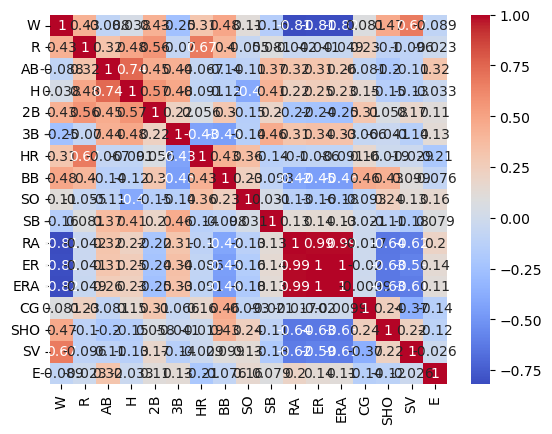

In [6]:
df.describe()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [7]:
print(df.head())

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


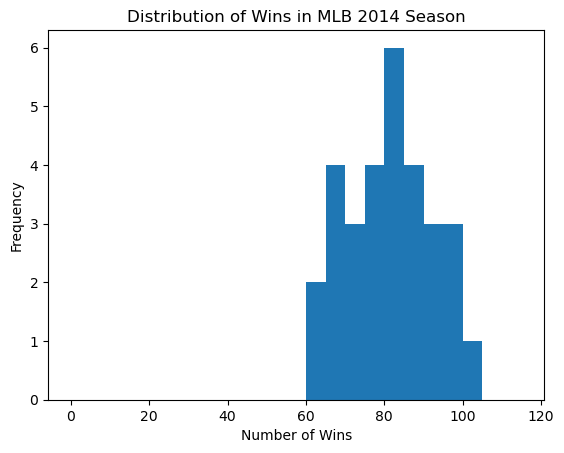

In [8]:
plt.hist(df['W'], bins=range(0, 120, 5))
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.title('Distribution of Wins in MLB 2014 Season')
plt.show()

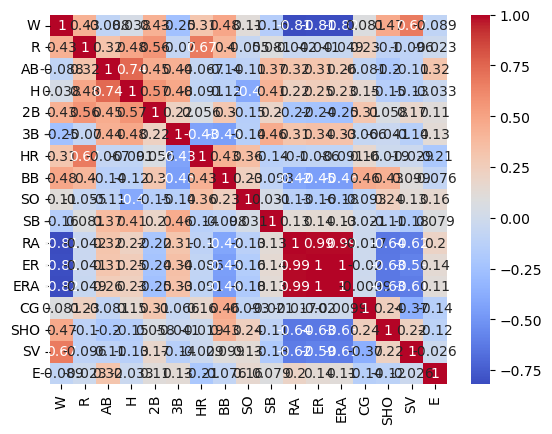

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

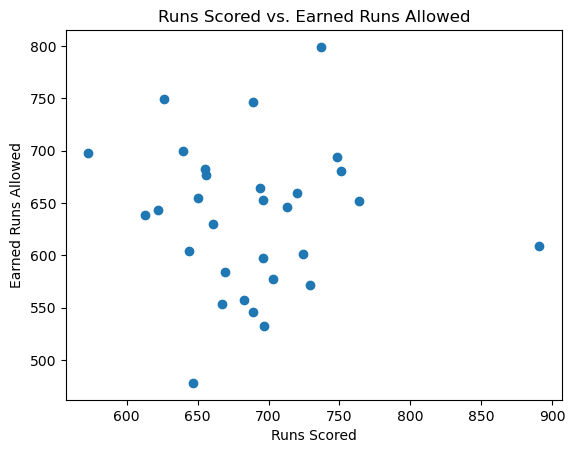

In [10]:
plt.scatter(df['R'], df['ER'])
plt.xlabel('Runs Scored')
plt.ylabel('Earned Runs Allowed')
plt.title('Runs Scored vs. Earned Runs Allowed')
plt.show()

In [11]:
df.dropna(inplace=True)
df[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SHO', 'SV', 'E']] = df[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SHO', 'SV', 'E']].div(1000)


X = df.drop('W', axis=1)
y = df['W']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 0.00
R-squared: 0.79


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

In [14]:
df = pd.read_csv("avocado.csv")

In [15]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.describe()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


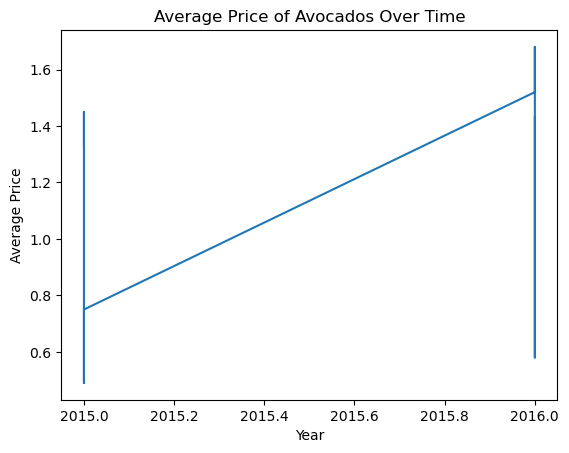

In [19]:
plt.plot(df['year'], df['AveragePrice'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados Over Time')
plt.show()

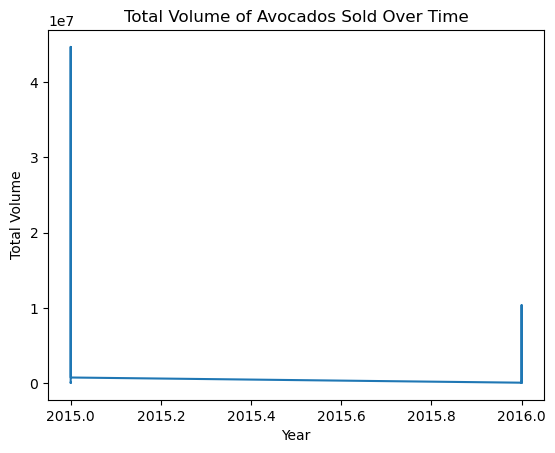

In [20]:
plt.plot(df['year'], df['Total Volume'])
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocados Sold Over Time')
plt.show()

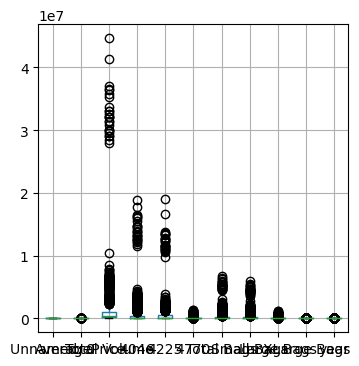

In [21]:
df.boxplot(figsize=(4, 4))
plt.show()

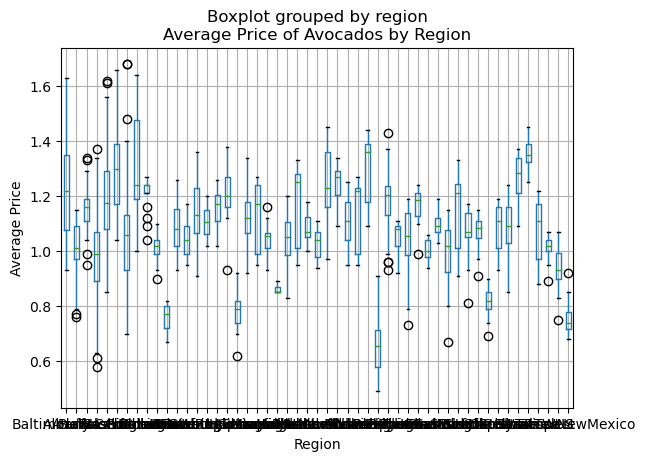

In [23]:
df.boxplot(column='AveragePrice', by='region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados by Region')
plt.show()

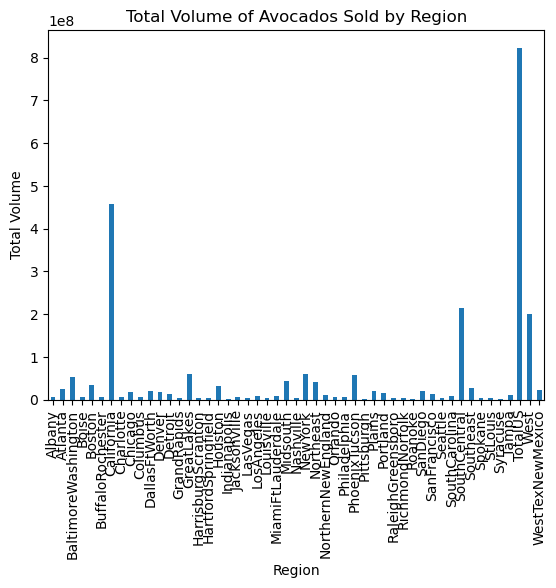

In [25]:
df.groupby('region')['Total Volume'].sum().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocados Sold by Region')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: could not convert string to float: '06-09-2015'

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop('region', axis=1)
y = df['region']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: could not convert string to float: '06-09-2015'

In [31]:
df = pd.read_csv('https://github.com/OmerFarukMerey/IBM-HR-Analytics-Employee-Attrition-Performance/blob/main/HR-Employee-Attrition.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 40, saw 19


•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip

In [34]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [36]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Axes: xlabel='Age', ylabel='Density'>

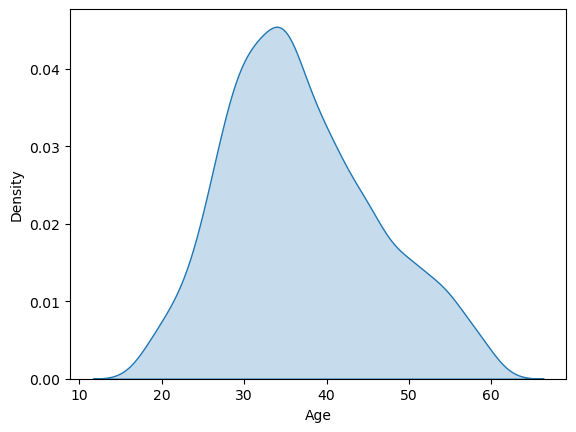

In [40]:
sns.kdeplot(employee_data['Age'],fill=True)

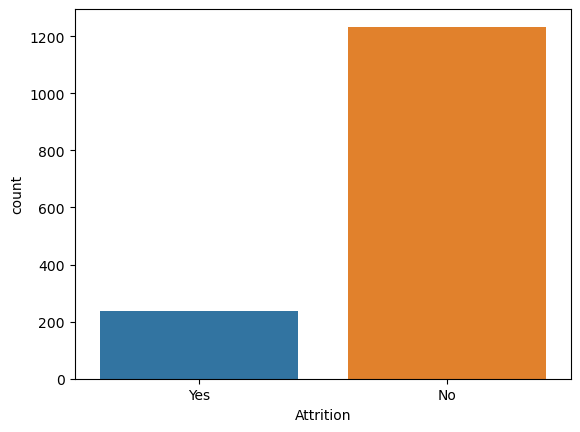

In [41]:
sns.countplot(x="Attrition", data=employee_data)
plt.show()

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

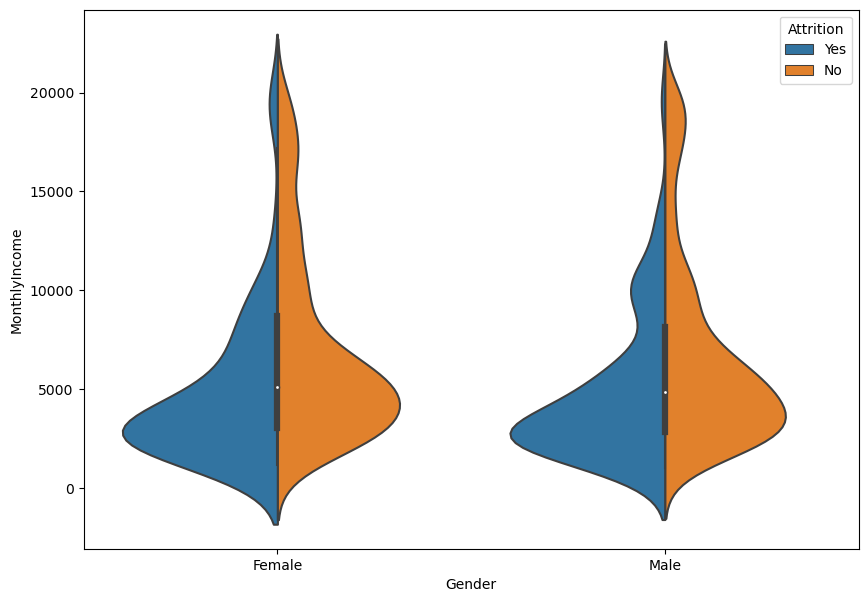

In [42]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=employee_data)

Text(0.5, 1.0, 'Education Field Ratio')

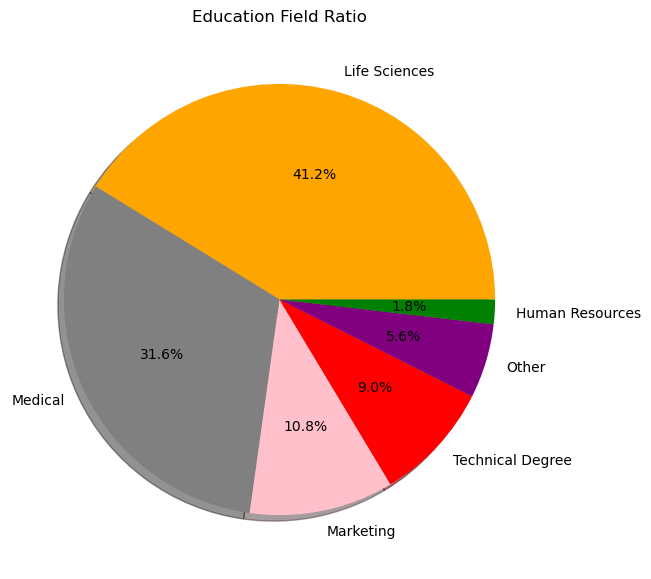

In [43]:
val_counts = employee_data.EducationField.value_counts()
labels = val_counts.index
size_labels = val_counts.values
colors = ["orange", "grey", "pink", "red", "purple", "green"]
plt.figure(figsize=(7,7))
plt.pie(size_labels,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True)
plt.title("Education Field Ratio")

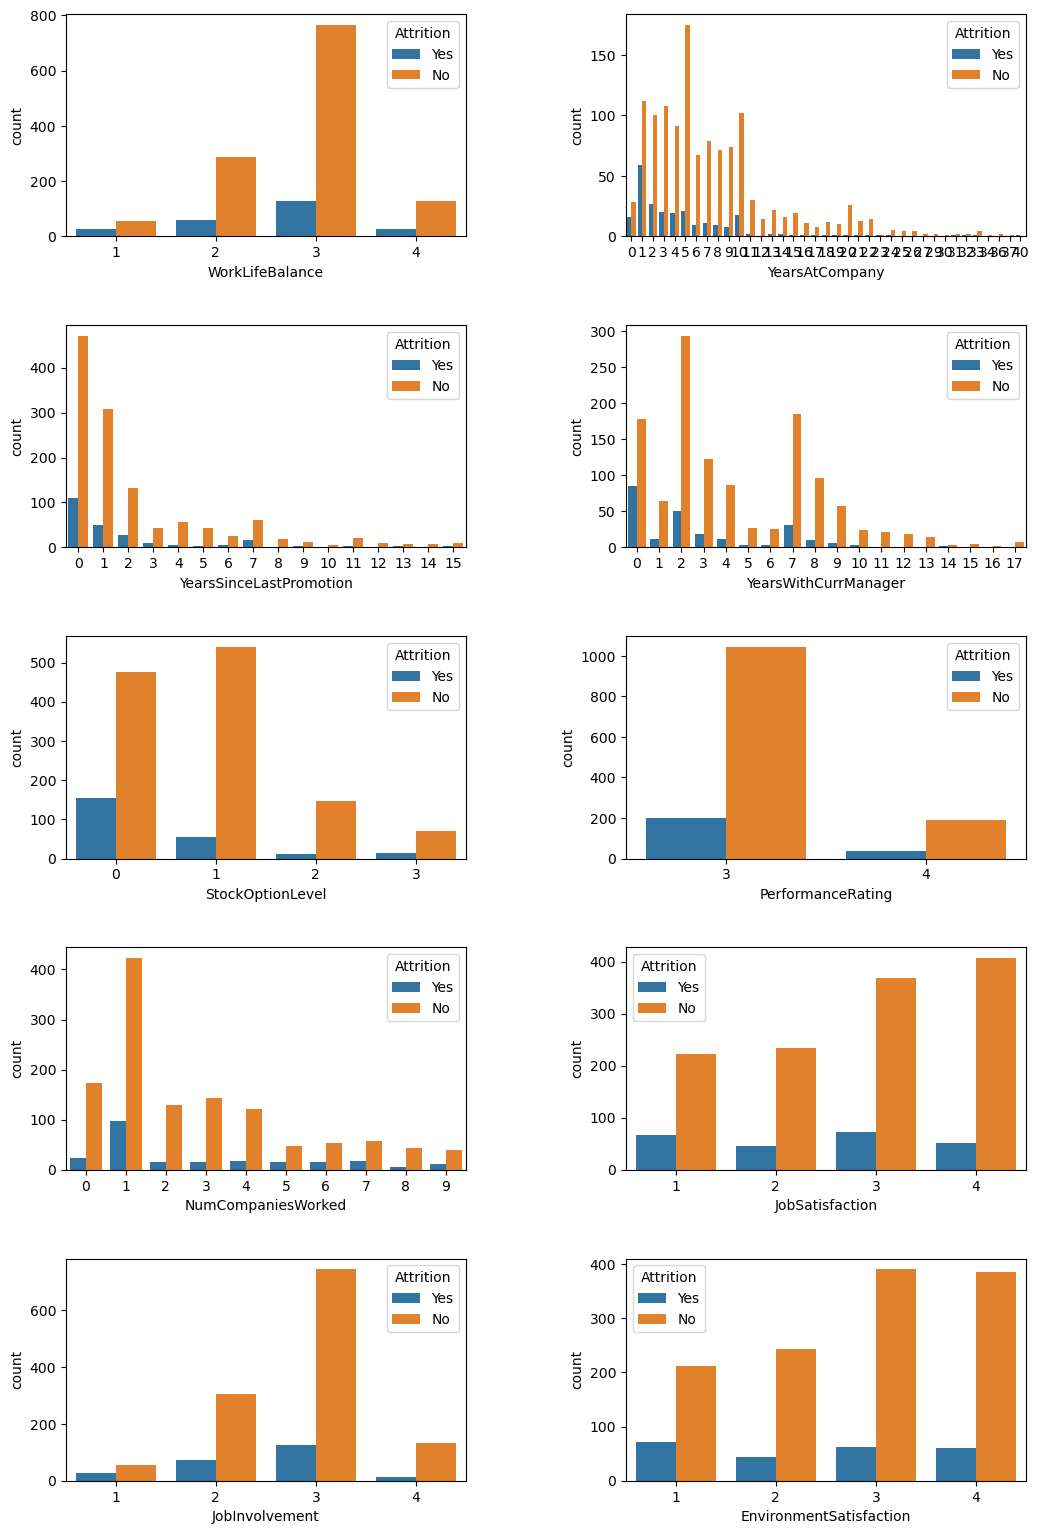

In [44]:
column_labels = [
 "WorkLifeBalance",
 "YearsAtCompany",
 "YearsSinceLastPromotion",
 "YearsWithCurrManager",
 "StockOptionLevel",
 "PerformanceRating",
 "NumCompaniesWorked",
 "JobSatisfaction",
 "JobInvolvement",
 "EnvironmentSatisfaction"
]
plt.figure(figsize=(12,30))
for ind,col in enumerate(column_labels):
    plt.subplot(8,2,ind+1)
    sns.countplot(x=col, hue="Attrition", data=employee_data)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [45]:
pd.crosstab(columns=[employee_data.Attrition],index=[employee_data.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


In [46]:
X = employee_data.drop("Attrition", axis=1)
y = employee_data["Attrition"]
from sklearn.model_selection import train_test_split

np.random.seed(12345)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,stratify=y)
X_train.shape
X_test.shape
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [52]:
X = df[['SatisfactionLevel', 'LastEvaluation', 'NumberOfProjects', 'YearsAtCompany', 'YearsInCurrentRole', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'ExercisedStockOptions', 'JobRole']]
y = df['Attrition']


KeyError: "['SatisfactionLevel', 'LastEvaluation', 'NumberOfProjects', 'ExercisedStockOptions'] not in index"

In [53]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Travel_Rarely'

In [54]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

ValueError: could not convert string to float: 'Non-Travel'